In [ ]:
! pip install bqplot
! pip install pingouin
! pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=d4c7aa92d3ea1c43c25ac229c731b89fe30d333ce030ed8e52c74682de929f5a
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
from sklearn.cluster import DBSCAN

# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os

#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

#Montar la unidad en drive
from google.colab import drive
import os

drive.mount('/content/gdrive')

# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, LabelEncoder

%matplotlib inline


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
path = '/content/gdrive/MyDrive/Colab_Notebooks/CoderHouse/Datasets/insurance_data_1000.xlsx'
df = pd.read_excel(path)

df.head()

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42


# Paso 1. Analisis Exploratorio de datos (EDA)

### medidas para realizar cálculos
### income, age y claims

### dimensiones -> tageables





In [ ]:
print('Estructura del dataframe:', df.shape)
df.info()


Estructura del dataframe: (1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case_id   1000 non-null   int64  
 1   income    1000 non-null   float64
 2   age       1000 non-null   int64  
 3   sex       1000 non-null   object 
 4   approval  1000 non-null   object 
 5   fraud     1000 non-null   object 
 6   claims    1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


### Histogram

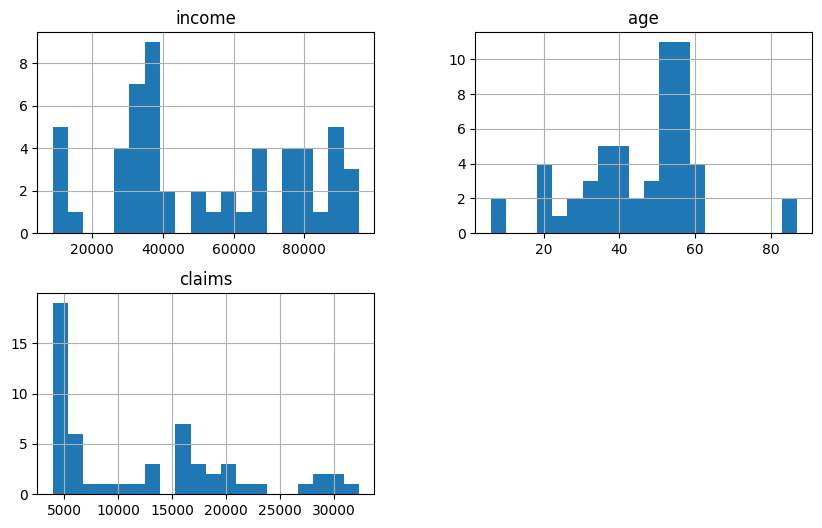

In [ ]:
df_frauds = df[df['fraud'] == 'Under Review']
df_frauds.head()
df_frauds [['income', 'age', 'claims']].hist(bins=20, figsize=(10, 6))
plt.show()

### Boxplot

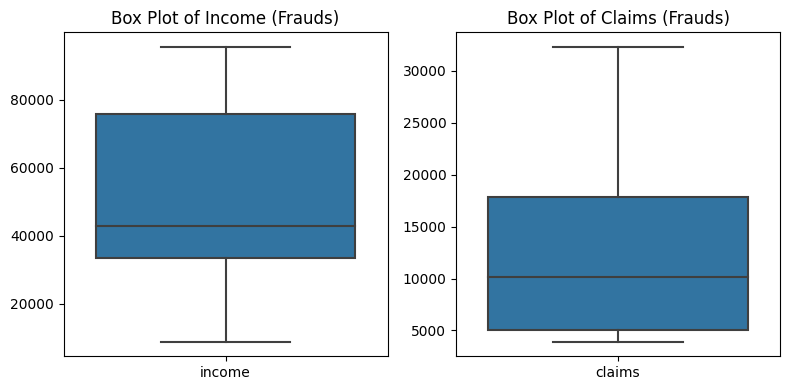

In [ ]:
# Crear dos boxplots separados para 'income' y 'claims'
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # Primer subplot para 'income'
sns.boxplot(data=df_frauds[['income']])
plt.title('Box Plot of Income (Frauds)')

plt.subplot(1, 2, 2)  # Segundo subplot para 'claims'
sns.boxplot(data=df_frauds[['claims']])
plt.title('Box Plot of Claims (Frauds)')

plt.tight_layout()  # Ajustar el espaciado entre subplots
plt.show()

### Heatmap

#### Income y Age tienen una correlación positiva moderada


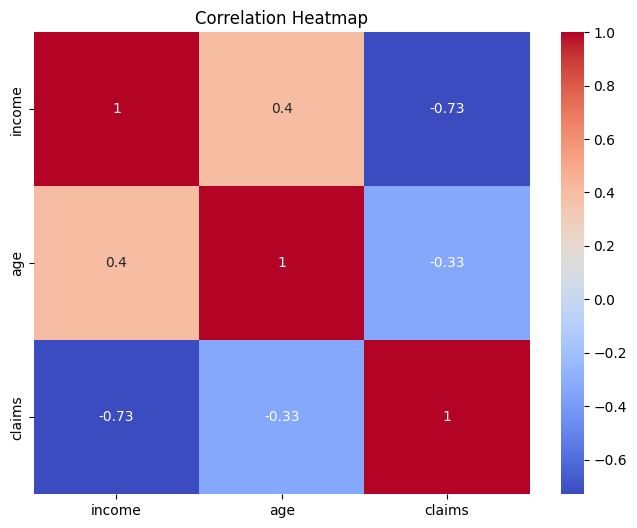

In [ ]:
# Mapa de calor de correlación
correlation_matrix = df[['income', 'age', 'claims']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Paso 2 y 3: Preprocesamiento de datos y elección de features

## Acuerdate se utiliza label_encoder y se estandarizan los features (X)

In [ ]:
df.head()

,case_id,income,age,sex,approval,fraud,claims
0,59982,35750.95,42,M,Approved,Under Review,9518.95
1,87249,24078.27,19,M,Denied,No,19354.23
2,50406,39241.52,37,M,Denied,Fraud,13056.04
3,59391,33248.31,26,M,Approved,No,19238.37
4,96622,38649.96,54,M,Approved,No,14427.42


In [ ]:
label_encoder = LabelEncoder()
df['sex_encoder'] = label_encoder.fit_transform(df['sex'])
df['approval_encoder'] = 1 - label_encoder.fit_transform(df['approval'])    # Asigna 1 a aprobado y 0 a denegado
df['fraud_encoder'] = label_encoder.fit_transform(df['fraud'])


# Normalizar las características numéricas
features = ['income', 'age', 'claims']
scaler = StandardScaler()

df[features] = scaler.fit_transform(df[features])

# Mostrar el dataframe después del preprocesamiento
print(df.head())

   case_id    income       age sex  approval         fraud    claims  \
0    59982 -0.481712  0.087837   M  Approved  Under Review -0.461197   
1    87249 -1.014167 -1.495436   M    Denied            No  0.754190   
2    50406 -0.322488 -0.256353   M    Denied         Fraud -0.024104   
3    59391 -0.595871 -1.013570   M  Approved            No  0.739873   
4    96622 -0.349472  0.913893   M  Approved            No  0.145363   

   sex_encoder  approval_encoder  fraud_encoder  
0            1                 1              2  
1            1                 0              1  
2            1                 0              0  
3            1                 1              1  
4            1                 1              1  


# Paso 4: Elección del Número de Clusteres (k)

In [ ]:
features = ['income', 'age', 'claims']
X_scaled = df[features]

([<matplotlib.axis.XTick at 0x79e5995b98a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

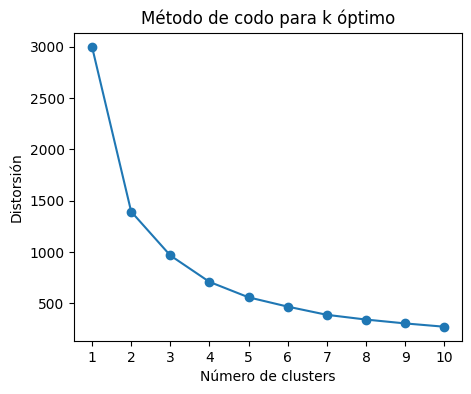

In [ ]:
distortions = []
max_k = 10

for k in range(1, max_k + 1):

  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(X_scaled)
  distortions.append(kmeans.inertia_)

# Graficando Elbow Method
plt.figure(figsize=(5,4))
plt.plot(range(1, max_k + 1), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.title('Método de codo para k óptimo')
plt.xticks(range(1, max_k + 1))

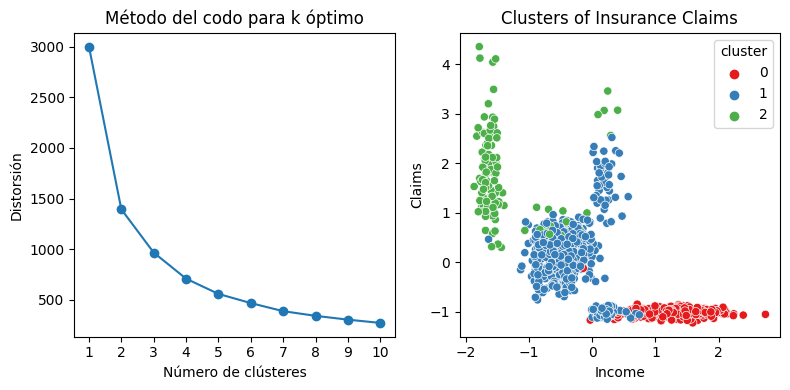

In [ ]:
# Aplicando el Kmeans
optimal_k = 3

# Aplicar KMeans con el número óptimo de clusteres
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)                        ## Importante

# Crear subplots con 1 fila y 2 columnas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Graficar el método del codo
axes[0].plot(range(1, max_k + 1), distortions, marker='o')
axes[0].set_xlabel('Número de clústeres')
axes[0].set_ylabel('Distorsión')
axes[0].set_title('Método del codo para k óptimo')
axes[0].set_xticks(range(1, max_k + 1))

# Gráfico de dispersión para visualizar los clústeres
sns.scatterplot(data=df, x='income', y='claims', hue='cluster', palette='Set1', ax=axes[1])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Claims')
axes[1].set_title('Clusters of Insurance Claims')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

# Paso 6 y 7 Interpretación de Resultados y Conclusiones


In [ ]:
cluster_fraud_counts = df.groupby(['cluster', 'fraud']).size().unstack()  ## size elementos de los datos. unstack le da la estructura tabular a los datos (estructura de tabla)
print(cluster_fraud_counts)

print('-------------------------------------------')

#Calcular el total de filas por clúster
cluster_totals = cluster_fraud_counts.sum(axis=1)

#Calcular los porcentajes dividiendo cada valor por el total y multiplicado por 100
cluster_fraud_percentages = cluster_fraud_counts.divide(cluster_totals, axis=0) * 100
print(cluster_fraud_percentages)

fraud    Fraud   No  Under Review
cluster                          
0           37  241            23
1           60  496            25
2           18   93             7
-------------------------------------------
fraud        Fraud         No  Under Review
cluster                                    
0        12.292359  80.066445      7.641196
1        10.327022  85.370052      4.302926
2        15.254237  78.813559      5.932203


## Explicación de resultados:

### Aquellas personas con menor ingreso, que solicitan prestamos grandes, son mas propensos a casos de fraude

### Se puede asignar riesgo dependiendo del cluster
* 0 bajo riesgo
* 1 riesgo medio
* 2 riesgo alto
